In [220]:
import re
import pandas as pd
from datetime import datetime


In [221]:
import pandas as pd
import numpy as np
from datetime import datetime

# Open the text file
with open('/home/anon/Downloads/WhatsApp Chat with MCA 2022-24 Unofficial(1).txt', 'r') as f:
    # Read the lines from the file
    lines = f.readlines()

# Function to extract information from each line
def extract_info(line):
    # Check for both 12-hour and 24-hour time formats
    date_formats = ['%d/%m/%y, %I:%M %p', '%d/%m/%y, %H:%M -']
    
    for date_format in date_formats:
        try:
            date_obj = datetime.strptime(line[:17], date_format)
            message = line[17:].strip()
            return date_obj, message
        except ValueError:
            continue

    # print(f"Error parsing date on line: {line}")
    return None

# Process lines and concatenate multi-line messages
processed_lines = []
current_date = None
current_message = ""
for line in lines:
    line = line.strip()
    if not line:
        continue  # Skip empty lines

    extracted_info = extract_info(line)
    if extracted_info:
        if current_message:
            processed_lines.append((current_date, current_message))
            current_message = ""
        current_date, current_message = extracted_info
    else:
        # Concatenate multi-line messages
        current_message += ' ' + line

# Process the last message if there is any
if current_message:
    processed_lines.append((current_date, current_message))

# Create a pandas DataFrame
df = pd.DataFrame(processed_lines, columns=['date', 'usermessage'])

# Convert the date column to the desired format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = df['date'].dt.strftime('%d/%m/%y %I:%M %p')

# Remove leading hyphen from user messages
df['usermessage'] = df['usermessage'].str.lstrip('-')


df[['user', 'message']] = df['usermessage'].str.extract(r'([^:]+):?(.*)')

df.drop('usermessage', axis=1, inplace=True)
df.loc[df['message'] == '', 'message'] = df['user']
df.loc[df['message'] == df['user'], 'user'] = 'group-notification'
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %I:%M %p')

# Create new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%B')  # Full month name
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['am/pm'] = df['date'].dt.strftime('%p')
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date

# Drop the original 'date' column



df = df[~np.isnan(df['year'])]
df['year'] = df['year'].astype(int)
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [222]:
cf = df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]

pd.DataFrame(round(cf['user'].value_counts()/len(cf)*100,2)).reset_index().info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   user    74 non-null     object 
 1   count   74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07


In [223]:
cf=df
keywords = ['added', 'left', 'security', 'changed', 'removed', 'deleted', 'group-notification']
cf = cf[~cf['user'].str.contains('|'.join(keywords))]
cf = cf[~cf['message'].str.contains('<Media omitted>')]
f=open('stop_hinglish.txt','r')
stop_hinglish=f.read()
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [224]:
words=[]
for message in cf['message']:
    for word in message.lower().split():
        if word not in stop_hinglish:
            words.append(word)

In [225]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20)).reset_index().drop(columns=['index']).rename(columns={0:'words',1:'freq'})

,words,freq
0,class,335
1,kumar,316
2,lab,220
3,web,212
4,kumari,204
5,students,178
6,islam,127
7,mam,125
8,dsa,124
9,group,120


In [226]:
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [227]:
import emoji
emojis=[]
for message in df["message"]:
    emojis.extend(emoji.emoji_list(message))


In [228]:

emojis = [entry['emoji'] for entry in emojis]

emojis

['✌️',
 '😇',
 '✌️',
 '😎',
 '👍',
 '😂',
 '👍🏻',
 '✋',
 '🥲',
 '🥹',
 '🥲',
 '😂',
 '👍🏻',
 '🤘🏻',
 '🥲',
 '😂',
 '✋',
 '🖐🏻',
 '🌚',
 '✌',
 '💯',
 '😁',
 '🌚',
 '🖐',
 '😊',
 '🥳',
 '🤩',
 '❤️',
 '❤️',
 '👉',
 '👉',
 '❣️',
 '❣️',
 '❣️',
 '☝️',
 '❤️',
 '🥲',
 '😂',
 '😂',
 '🖐️',
 '🤚',
 '😂',
 '🙁',
 '🤔',
 '🫂',
 '🥲',
 '🥲',
 '🤔',
 '👍',
 '🥲',
 '😀',
 '🥲',
 '🤟',
 '👍',
 '🤣',
 '✨',
 '❤️',
 '❤️',
 '💫',
 '🥰',
 '✨',
 '🥱',
 '❤️',
 '✨',
 '🔥',
 '🔥',
 '✨',
 '🌷',
 '🌷',
 '🌹',
 '😍',
 '⚡',
 '❤️',
 '❤️',
 '❤',
 '🙏',
 '🥹',
 '🚶🏻\u200d♂️',
 '🥱',
 '❣️',
 '✋',
 '❤',
 '😂',
 '🥲',
 '😃',
 '😑',
 '🤝',
 '🤝',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '👍🏻',
 '🤔',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '▫️',
 '🤣',
 '🤣',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🙂',
 '😀',
 '😂',
 '🤭',
 '🤣',
 '👍🏻',
 '🥲',
 '🤣',
 '👍🏻',
 '👍',
 '🙂',
 '🤝',
 '✨',
 '👍',
 '🪄',
 '🦄',
 '🦄',
 '🫂',
 '👍',
 '✨',
 '🙂',
 '🤝',
 '👍',
 '😅',
 '🥳',
 '😐',
 '😑'

In [229]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis)))).reset_index().drop(columns=['index']).rename(columns={0:'emoji',1:'frequency'})
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07
...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01


In [230]:
import calendar

def g(df):
    df['month_number'] = df['month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12,'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
    return df

df = g(df.copy())
df


,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01,1
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01,1


In [231]:
timeline=df.groupby(['year','month_number','month']).count()['message'].reset_index()

In [232]:
time=[]
for i in range(len(timeline)):
    time.append(timeline['month'][i]+' - '+ str(timeline['year'][i]))

In [233]:
time

['December - 2022',
 'January - 2023',
 'February - 2023',
 'March - 2023',
 'April - 2023',
 'May - 2023',
 'June - 2023',
 'July - 2023',
 'August - 2023',
 'September - 2023',
 'October - 2023',
 'November - 2023',
 'December - 2023',
 'January - 2024']

In [234]:
timeline['time']=time
timeline

,year,month_number,month,message,time
0,2022,12,December,731,December - 2022
1,2023,1,January,593,January - 2023
2,2023,2,February,894,February - 2023
3,2023,3,March,887,March - 2023
4,2023,4,April,474,April - 2023
5,2023,5,May,664,May - 2023
6,2023,6,June,202,June - 2023
7,2023,7,July,425,July - 2023
8,2023,8,August,409,August - 2023
9,2023,9,September,315,September - 2023


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'December - 2022'),
  Text(1, 0, 'January - 2023'),
  Text(2, 0, 'February - 2023'),
  Text(3, 0, 'March - 2023'),
  Text(4, 0, 'April - 2023'),
  Text(5, 0, 'May - 2023'),
  Text(6, 0, 'June - 2023'),
  Text(7, 0, 'July - 2023'),
  Text(8, 0, 'August - 2023'),
  Text(9, 0, 'September - 2023'),
  Text(10, 0, 'October - 2023'),
  Text(11, 0, 'November - 2023'),
  Text(12, 0, 'December - 2023'),
  Text(13, 0, 'January - 2024')])

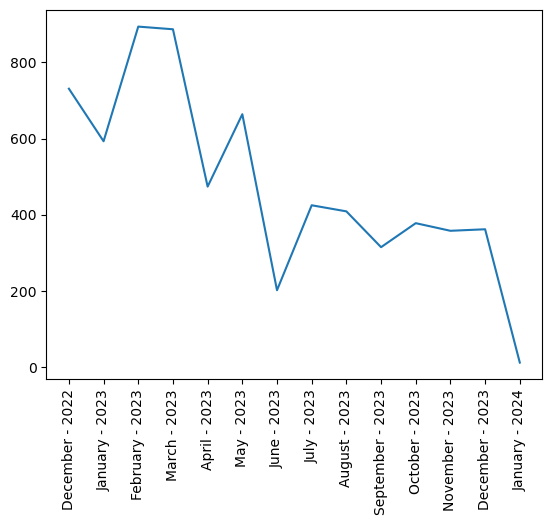

In [235]:
import matplotlib.pyplot as plt
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')

In [236]:
df.head()

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12


In [237]:
df['dayname']=df['date'].dt.day_name()

df['only_date']=df['date'].dt.date
df

,date,user,message,year,month,day,hour,minute,am/pm,dayname,only_date,month_number
0,2022-12-07 13:38:00,group-notification,Messages and calls are end-to-end encrypted. N...,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
1,2022-12-07 13:27:00,group-notification,"Udhaya MCA created group ""MCA 2022 - 2024""",2022,December,7,13,27,PM,Wednesday,2022-12-07,12
2,2022-12-07 13:38:00,group-notification,Saumik Pu added Anu,2022,December,7,13,38,PM,Wednesday,2022-12-07,12
3,2022-12-07 13:44:00,group-notification,Udhaya MCA added +91 73392 47884,2022,December,7,13,44,PM,Wednesday,2022-12-07,12
4,2022-12-07 13:54:00,group-notification,Udhaya MCA added Fasal MCA,2022,December,7,13,54,PM,Wednesday,2022-12-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...
6699,2024-01-01 00:23:00,Subasri MCA,Happy new year to you all😍🥳,2024,January,1,0,23,AM,Monday,2024-01-01,1
6700,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6701,2024-01-01 10:39:00,Soubhagya,This message was deleted,2024,January,1,10,39,AM,Monday,2024-01-01,1
6702,2024-01-01 22:19:00,Nilay MCA,@918072660518 at what time PDA exam will be ...,2024,January,1,22,19,PM,Monday,2024-01-01,1


In [238]:
df.groupby('only_date').count()['message'].reset_index()

,only_date,message
0,2022-12-07,37
1,2022-12-08,23
2,2022-12-09,6
3,2022-12-11,3
4,2022-12-12,15
...,...,...
337,2023-12-26,10
338,2023-12-27,2
339,2023-12-30,36
340,2023-12-31,19


In [239]:
df['dayname'].value_counts().reset_index().rename(columns={'count':'message'})

,dayname,message
0,Monday,1222
1,Wednesday,1202
2,Friday,1160
3,Thursday,951
4,Tuesday,903
5,Saturday,706
6,Sunday,560


In [240]:
df['month'].value_counts().reset_index().rename(columns={'count':'message'})

,month,message
0,December,1093
1,February,894
2,March,887
3,May,664
4,January,605
5,April,474
6,July,425
7,August,409
8,October,378
9,November,358


In [241]:
def get_time_period(hour):
    if 0<=hour<1:
        return "12AM - 1AM"
    elif 1<= hour <11:
        return f'{hour}AM - {hour+1}AM'
    elif hour == 11:
        return '11AM - 12PM'
    elif hour == 12:
        return '12PM - 1PM'
    elif hour == 23:
        return f'{hour-12}PM - 12AM'
    elif 12 < hour <23:
        return f'{hour-12}PM - {hour-11}PM'
        
    
df['period'] = df['hour'].apply(get_time_period)
df['period'].unique()


array(['1PM - 2PM', '2PM - 3PM', '3PM - 4PM', '4PM - 5PM', '6PM - 7PM',
       '8PM - 9PM', '9PM - 10PM', '9AM - 10AM', '12PM - 1PM',
       '10PM - 11PM', '7AM - 8AM', '8AM - 9AM', '11AM - 12PM',
       '10AM - 11AM', '5PM - 6PM', '7PM - 8PM', '12AM - 1AM', '1AM - 2AM',
       '6AM - 7AM', '11PM - 12AM', '2AM - 3AM', '4AM - 5AM', '3AM - 4AM',
       '5AM - 6AM'], dtype=object)

In [242]:
def get_time_period(hour):
    if 0 <= hour < 1:
        return '12AM - 1AM'
    elif 1 <= hour < 12:
        return f'{hour}AM - {hour+1}AM'
    elif hour == 12:
        return '12PM - 1PM'
    else:
        return f'{hour-12}PM - {hour-11}PM'
df['period'] = df['hour'].apply(get_time_period)
heat_map=df[['period', 'dayname']].value_counts().reset_index().rename(columns={'count': 'message'})


In [243]:
period_order = ['12AM - 1AM', '1AM - 2AM', '2AM - 3AM', '3AM - 4AM', '4AM - 5AM',
                '5AM - 6AM', '6AM - 7AM', '7AM - 8AM', '8AM - 9AM', '9AM - 10AM',
                '10AM - 11AM', '11AM - 12PM', '12PM - 1PM', '1PM - 2PM', '2PM - 3PM',
                '3PM - 4PM', '4PM - 5PM', '5PM - 6PM', '6PM - 7PM', '7PM - 8PM',
                '8PM - 9PM', '9PM - 10PM', '10PM - 11PM', '11PM - 12AM']
df['period'] = pd.Categorical(df['period'], categories=period_order, ordered=True)

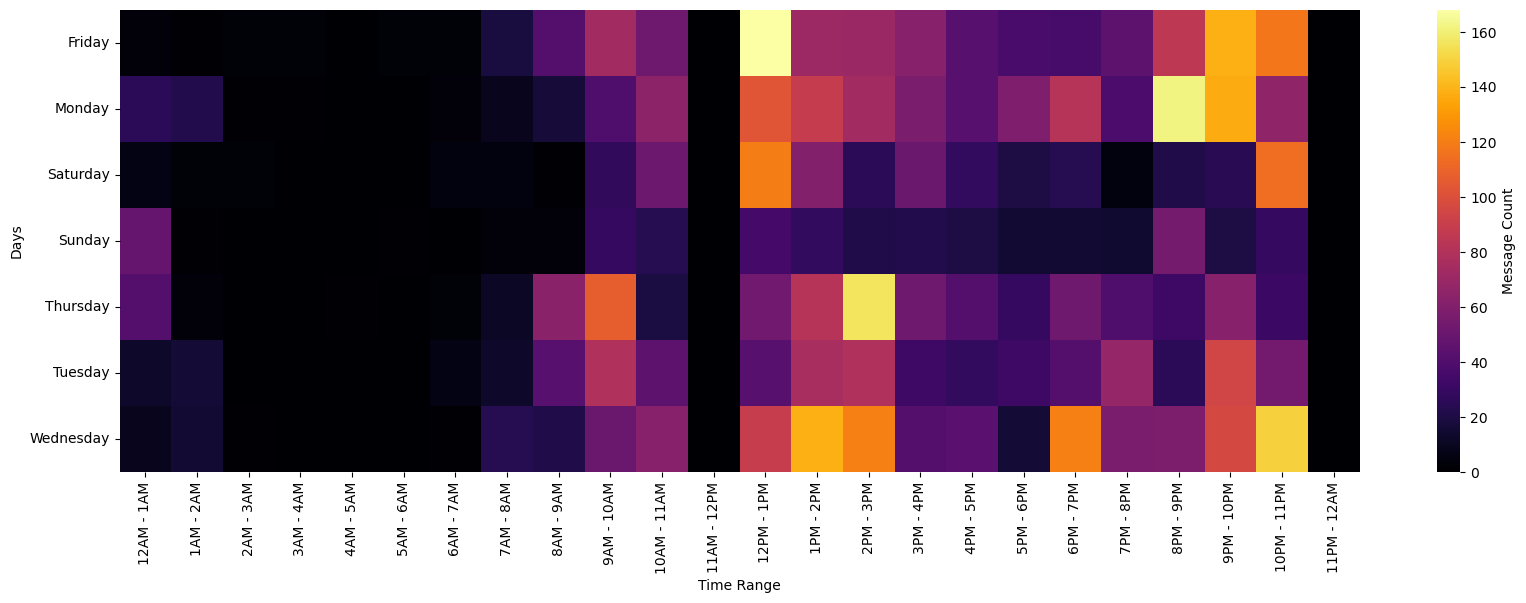

In [244]:
import seaborn as sns
plt.figure(figsize=(20,6))
heatmap_data = df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='inferno', cbar_kws={'label': 'Message Count'})
plt.xlabel('Time Range')
plt.ylabel('Days')
plt.show()

In [245]:
df.pivot_table(index='dayname', columns='period', values='message', aggfunc='count').fillna(0)

period,12AM - 1AM,1AM - 2AM,2AM - 3AM,3AM - 4AM,4AM - 5AM,5AM - 6AM,6AM - 7AM,7AM - 8AM,8AM - 9AM,9AM - 10AM,...,2PM - 3PM,3PM - 4PM,4PM - 5PM,5PM - 6PM,6PM - 7PM,7PM - 8PM,8PM - 9PM,9PM - 10PM,10PM - 11PM,11PM - 12AM
dayname,,,,,,,,,,,,,,,,,,,,,
Friday,3,1,2,2,0,2,2,18,41,73,...,70,62,42,37,36,45,85,138,117,0
Monday,25,22,1,1,0,0,3,9,17,39,...,73,57,42,59,82,38,162,137,65,0
Saturday,6,2,2,0,0,0,4,4,1,27,...,25,50,28,20,23,4,21,24,114,0
Sunday,48,1,0,0,0,1,0,3,3,29,...,21,22,20,15,15,14,55,20,29,0
Thursday,41,3,0,0,1,0,2,11,63,107,...,156,52,41,29,52,39,32,62,31,0
Tuesday,13,16,0,0,0,0,6,13,42,79,...,79,32,28,32,41,68,25,94,54,0
Wednesday,9,15,1,0,0,0,1,23,21,50,...,121,41,43,16,121,57,58,96,149,0
